In [1]:
import pandas as pd


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Chocolate Sales.csv')
df

,Sales Person,Country,Product,Date,Amount,Boxes Shipped
0,Jehu Rudeforth,UK,Mint Chip Choco,04-Jan-22,"$5,320",180
1,Van Tuxwell,India,85% Dark Bars,01-Aug-22,"$7,896",94
2,Gigi Bohling,India,Peanut Butter Cubes,07-Jul-22,"$4,501",91
3,Jan Morforth,Australia,Peanut Butter Cubes,27-Apr-22,"$12,726",342
4,Jehu Rudeforth,UK,Peanut Butter Cubes,24-Feb-22,"$13,685",184
...,...,...,...,...,...,...
1089,Karlen McCaffrey,Australia,Spicy Special Slims,17-May-22,"$4,410",323
1090,Jehu Rudeforth,USA,White Choc,07-Jun-22,"$6,559",119
1091,Ches Bonnell,Canada,Organic Choco Syrup,26-Jul-22,$574,217
1092,Dotty Strutley,India,Eclairs,28-Jul-22,"$2,086",384


In [ ]:
df.shape

(1094, 6)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sales Person   1094 non-null   object
 1   Country        1094 non-null   object
 2   Product        1094 non-null   object
 3   Date           1094 non-null   object
 4   Amount         1094 non-null   object
 5   Boxes Shipped  1094 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 51.4+ KB


In [ ]:
df.describe()

,Date,Amount,Boxes Shipped
count,1094,1094.000000,1094.000000
mean,2022-05-03 09:04:56.160877568,5652.308044,161.797989
min,2022-01-03 00:00:00,7.000000,1.000000
25%,2022-03-02 00:00:00,2390.500000,70.000000
50%,2022-05-11 00:00:00,4868.500000,135.000000
75%,2022-07-04 00:00:00,8027.250000,228.750000
max,2022-08-31 00:00:00,22050.000000,709.000000
std,NaN,4102.442014,121.544145


In [5]:
df['Amount'] = df['Amount'].replace('[\$,]', '', regex=True).astype(float)
df['Date'] = pd.to_datetime(df['Date'], format='%d-%b-%y', errors='coerce')
df['Boxes Shipped'] = pd.to_numeric(df['Boxes Shipped'], errors='coerce')
df['Month'] = df['Date'].dt.to_period('M')
df.head()

,Sales Person,Country,Product,Date,Amount,Boxes Shipped,Month
0,Jehu Rudeforth,UK,Mint Chip Choco,2022-01-04,5320.0,180,2022-01
1,Van Tuxwell,India,85% Dark Bars,2022-08-01,7896.0,94,2022-08
2,Gigi Bohling,India,Peanut Butter Cubes,2022-07-07,4501.0,91,2022-07
3,Jan Morforth,Australia,Peanut Butter Cubes,2022-04-27,12726.0,342,2022-04
4,Jehu Rudeforth,UK,Peanut Butter Cubes,2022-02-24,13685.0,184,2022-02


# **EXPLANATION**
In this code :

Do some necessary data cleaning before do any EDA

First we convert the datatype of AMOUNT as it shows obj type which in not correct

Secondly we change the format of DATE

## **EXPLORATORY DATA ANALYSIS**


In [6]:
# What is the total revenue generated by each salesperson (Kelci Walkden, Brien Boise, and Others)? How do their performances compare?

df['sale category']=df['Sales Person'].apply(lambda x:x if x in ['kelci Walkden','Brien Boise'] else 'others')
revenue_by_salesperson = df.groupby('sale category')['Amount'].sum()
revenue_by_salesperson





,Amount
sale category,
Brien Boise,312816.0
others,5870809.0


In [ ]:
# Which country (Australia, India, or Others) contributes the most to the total sales revenue? What percentage of the total revenue does it account for?

df['country category'] = df['Country'].apply(lambda x:x if x in ['Australia','India'] else 'others')
revenue_by_country = df.groupby('country category')['Amount'].sum()
revenue_by_percentage=(revenue_by_country/df['Amount'].sum())*100
revenue_by_percentage

,Amount
country category,
Australia,18.393208
India,16.912410
others,64.694382


In [7]:
#How many unique products are sold in the dataset? Which product (e.g., 50% Dark Bites,Eclairs, or Others) has the highest number of transactions?

unique_products = df['Product'].unique()
top_product =df['Product'].value_counts().idxmax()
print(unique_products)
print("---------------------------------")
print("The best selling is")
print(top_product)


['Mint Chip Choco' '85% Dark Bars' 'Peanut Butter Cubes'
 'Smooth Sliky Salty' '99% Dark & Pure' 'After Nines' '50% Dark Bites'
 'Orange Choco' 'Eclairs' 'Drinking Coco' 'Organic Choco Syrup'
 'Milk Bars' 'Spicy Special Slims' 'Fruit & Nut Bars' 'White Choc'
 'Manuka Honey Choco' 'Almond Choco' 'Raspberry Choco'
 'Choco Coated Almonds' "Baker's Choco Chips" 'Caramel Stuffed Bars'
 '70% Dark Bites']
---------------------------------
The best selling is
Eclairs


In [ ]:
#What is the trend of sales over time based on the Date column? Identify the month or period with the highest transaction count.
top_month = df.groupby('Month').size()
top_month


,0
Month,
2022-01,154
2022-02,110
2022-03,131
2022-04,118
2022-05,135
2022-06,163
2022-07,149
2022-08,134


float64


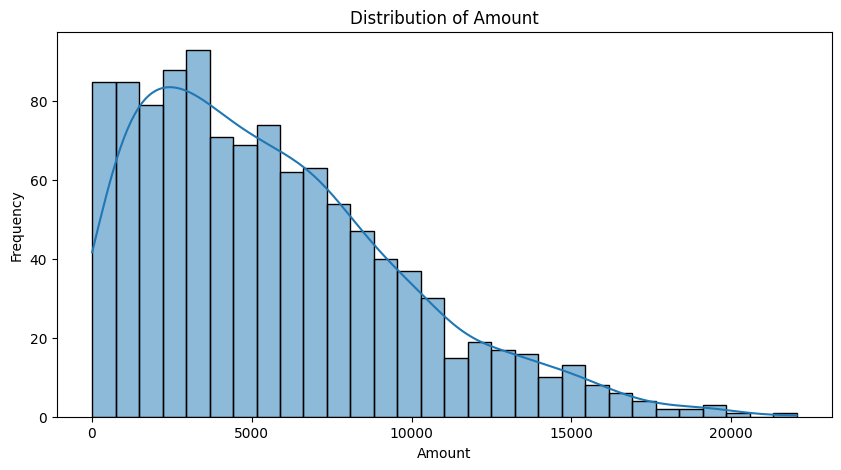

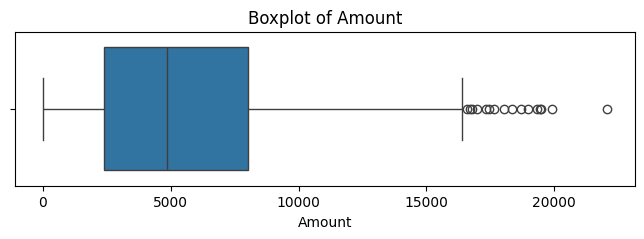

count     1094.000000
mean      5652.308044
std       4102.442014
min          7.000000
25%       2390.500000
50%       4868.500000
75%       8027.250000
max      22050.000000
Name: Amount, dtype: float64

Number of custom outliers (Amount > 638.20 or < 1.00): 1023
           Date      Sales Person   Amount
0    2022-01-04    Jehu Rudeforth   5320.0
1    2022-08-01       Van Tuxwell   7896.0
2    2022-07-07      Gigi Bohling   4501.0
3    2022-04-27      Jan Morforth  12726.0
4    2022-02-24    Jehu Rudeforth  13685.0
...         ...               ...      ...
1087 2022-05-24    Beverie Moffet   3066.0
1089 2022-05-17  Karlen McCaffrey   4410.0
1090 2022-06-07    Jehu Rudeforth   6559.0
1092 2022-07-28    Dotty Strutley   2086.0
1093 2022-05-23  Karlen McCaffrey   5075.0

[1023 rows x 3 columns]


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

df['Month'] = df['Date'].dt.to_period('M')  # ✅ Use 'Date', not 'Amount'
df['Amount'] = pd.to_numeric(df['Amount'], errors='coerce')
print(df['Amount'].dtype)  # Should print float64
# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['Amount'], bins=30, kde=True)
plt.title('Distribution of Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()
# Boxplot
plt.figure(figsize=(8, 2))
sns.boxplot(x=df['Amount'])
plt.title('Boxplot of Amount')
plt.show()
# Check basic info
print(df['Amount'].describe())

# Calculate IQR
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
# outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = df[(df['Amount'] < 1.00) | (df['Amount'] > 638.5)]

print(f"\nNumber of custom outliers (Amount > 638.20 or < 1.00): {len(outliers)}")
print(outliers[['Date', 'Sales Person', 'Amount']])

Correlation Matrix:
                  Amount  Boxes Shipped
Amount         1.000000      -0.018827
Boxes Shipped -0.018827       1.000000


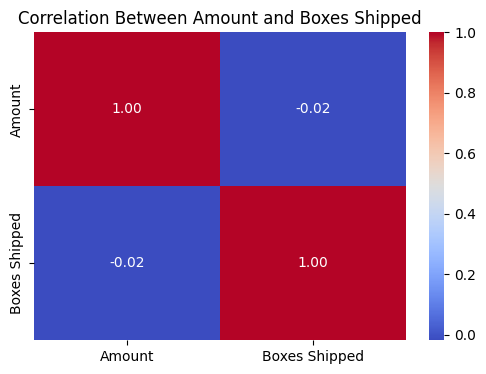

In [9]:
correlation = df[['Amount', 'Boxes Shipped']].corr()
print("Correlation Matrix:\n", correlation)

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Amount and Boxes Shipped')
plt.show()

# **STRONG OR WEAK RELATION**

"There is no meaningful correlation between Boxes Shipped and Amount, suggesting that the number of boxes shipped does not significantly influence revenue in this dataset."

The correlation between Amount and Boxes Shipped is -0.02, indicating no significant relationship between these two variables. This suggests that higher shipping volumes don't directly translate into higher sales revenue in this dataset

In [ ]:
top_shipper = df.groupby('Sales Person')['Boxes Shipped'].sum().sort_values(ascending=False)
top_shipper

,Boxes Shipped
Sales Person,
Karlen McCaffrey,9658
Beverie Moffet,9214
Dennison Crosswaite,8767
Kelci Walkden,8702
Oby Sorrel,8608
Brien Boise,8102
Marney O'Breen,8043
Jan Morforth,7661
Ches Bonnell,7522


In [ ]:
top_shipper = df.groupby('Sales Person')['Boxes Shipped'].sum().sort_values(ascending=False)
top_name = top_shipper.index[0]
top_value = top_shipper.iloc[0]

print(f"Top shipper is {top_name} with {top_value} boxes shipped.")


Top shipper is Karlen McCaffrey with 9658 boxes shipped.


Box count ≠ Revenue: The number of boxes shipped doesn't reflect the monetary value unless each box has the same value, which is rare.

In [ ]:
# 8. Check missing values
missing = df[['Sales Person', 'Country', 'Product', 'Date', 'Amount', 'Boxes Shipped']].isnull().sum()
missing

# 9. If dates are ranges like '07/14/2022 - 08/07/2022', split and average them
# df['Start Date'], df['End Date'] = df['Date'].str.split(' - ', expand=True)
# df['Date'] = (pd.to_datetime(df['Start Date']) + pd.to_datetime(df['End Date'])) / 2

# 10. Clean unrealistic values
df = df[df['Amount'] > 0]

# 11. Check "Other" proportions

country_counts = df['Country'].value_counts(normalize=True)
product_counts = df['Product'].value_counts(normalize=True)


# 12. Check for duplicate transactions
duplicates = df.duplicated(subset=['Sales Person', 'Date', 'Product', 'Amount', 'Boxes Shipped']).sum()
df = df.drop_duplicates()

In [ ]:
df.duplicated().sum()

np.int64(0)

This show no duplicate values

In [ ]:
print("Min:", df['Amount'].min())
print("Max:", df['Amount'].max())

Min: 7.0
Max: 22050.0


This shows there is no unrealistic value in amount column

In [ ]:
missing = df[['Sales Person', 'Country', 'Product', 'Date', 'Amount', 'Boxes Shipped']].isnull().sum()
missing

,0
Sales Person,0
Country,0
Product,0
Date,0
Amount,0
Boxes Shipped,0


No Missing values

In [ ]:
grouped = df.groupby('Sales Person')[['Amount', 'Boxes Shipped']].sum()

# Get top salesperson for each metric
top_amount_person = grouped['Amount'].idxmax()
top_amount_value = grouped['Amount'].max()

top_boxes_person = grouped['Boxes Shipped'].idxmax()
top_boxes_value = grouped['Boxes Shipped'].max()

# Convert top_amount_value to a numeric type
# Remove '$', ',', and spaces and convert to float


# Print results
print(f"Top revenue contributor: {top_amount_person} with amount ${top_amount_value:.2f}")
print(f"Top shipper: {top_boxes_person} with {top_boxes_value} boxes shipped")

Top revenue contributor: Ches Bonnell with amount $320901.00
Top shipper: Karlen McCaffrey with 9658 boxes shipped


In [ ]:
country_focus = revenue_by_country.sort_values(ascending=False)
country_focus=country_focus.idxmax()
top_amount=grouped['Amount'].max()
print("Country should the company focus on for expanding its chocolate sales is :")
print(f"Top country for chocolate sales is:{country_focus} with amount ${top_amount}")


Country should the company focus on for expanding its chocolate sales is :
Top country for chocolate sales is:others with amount $320901.0


In [ ]:
product_popularity = df['Product'].value_counts()

product_popularity

,count
Product,
Eclairs,60
50% Dark Bites,60
Smooth Sliky Salty,59
White Choc,58
Drinking Coco,56
Spicy Special Slims,54
Organic Choco Syrup,52
85% Dark Bars,50
Fruit & Nut Bars,50


We clealry see that Eclairs and %50 Dark Bites are most popular choclates

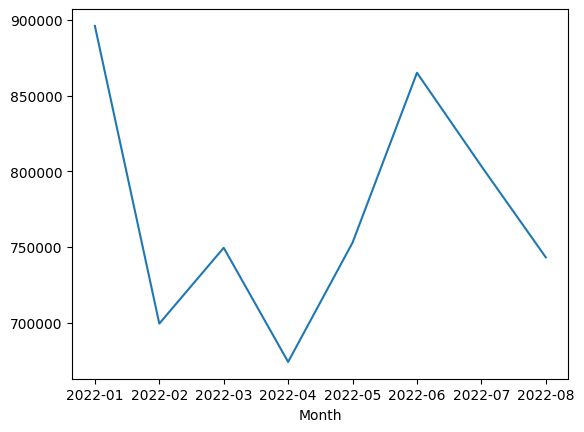

In [ ]:
monthly_revenue = df.groupby(df['Month'].astype(str))['Amount'].sum().plot(kind='line')


# **BUSINESS INSIGHTS**
There’s clear seasonal fluctuation in sales.

Strong start of the year (January) — possibly due to New Year demand or promotions.

A dip in spring (April) suggests low activity — maybe off-season.

June performed well, indicating another strong sales cycle.

Might be useful to investigate why April was weak and what caused the boost in June.

In [ ]:
current_total = df['Amount'].sum()
avg_revenue_per_box = current_total / df['Boxes Shipped'].sum()
increase_needed = 0.20 * current_total
extra_boxes = increase_needed / avg_revenue_per_box


print(f"Extra boxes needed to reach 20%: {extra_boxes:.2f}")

Extra boxes needed to reach 20%: 35401.40


In [ ]:
df['Revenue Category'] = df['Amount'].apply(lambda x: 'High' if x > 355 else 'Low')
df_encoded = pd.get_dummies(df, columns=['Sales Person', 'Country', 'Product'], drop_first=True)
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded

,Date,Amount,Boxes Shipped,Month,Sales Person_Barr Faughny,Sales Person_Beverie Moffet,Sales Person_Brien Boise,Sales Person_Camilla Castle,Sales Person_Ches Bonnell,Sales Person_Curtice Advani,...,Product_Organic Choco Syrup,Product_Peanut Butter Cubes,Product_Raspberry Choco,Product_Smooth Sliky Salty,Product_Spicy Special Slims,Product_White Choc,sale category_others,country category_India,country category_others,Revenue Category_Low
0,2022-01-04,5320.0,180,2022-01,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,2022-08-01,7896.0,94,2022-08,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False
2,2022-07-07,4501.0,91,2022-07,False,False,False,False,False,False,...,False,True,False,False,False,False,True,True,False,False
3,2022-04-27,12726.0,342,2022-04,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
4,2022-02-24,13685.0,184,2022-02,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1089,2022-05-17,4410.0,323,2022-05,False,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
1090,2022-06-07,6559.0,119,2022-06,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,True,False
1091,2022-07-26,574.0,217,2022-07,False,False,False,False,True,False,...,True,False,False,False,False,False,True,False,True,False
1092,2022-07-28,2086.0,384,2022-07,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False


In [ ]:
df_encoded = pd.get_dummies(df, columns=['Sales Person', 'Country', 'Product', 'sale category', 'country category'], drop_first=False)  # Set drop_first=False to keep all categories, including 'others'

In [ ]:
df['Revenue Category'] = df['Amount'].apply(lambda x: 'High' if x > 355 else 'Low')
df_encoded = pd.get_dummies(df, columns=['Sales Person', 'Country', 'Product'], drop_first=True)
# Keep 'Revenue Category' in the final encoded DataFrame
df_encoded = pd.get_dummies(df[['Revenue Category','Sales Person','Country','Product','Date','Boxes Shipped','Month','sale category','country category']], drop_first=True)
# Now df_encoded will have the necessary columns

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 1: Encode categorical features
df_encoded = pd.get_dummies(df, columns=['Sales Person', 'Country', 'Product','sale category','country category'], drop_first=True) # Include 'sale category', 'country category' in the get_dummies

# Step 2: Define X and y, EXPLICITLY DROPPING 'sale category' and 'country category'
X = df_encoded.drop(['Amount', 'Revenue Category', 'Date', 'Month'], axis=1)  # Dropping problematic columns, removed 'country category'
y = df_encoded['Revenue Category']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# ... (your existing code) ...

print("Shape of X_train_scaled:", X_train_scaled.shape) # Print shape of scaled X_train
print("Shape of X_test_scaled:", X_test_scaled.shape) # Print shape of scaled X_test

Shape of X_train_scaled: (875, 54)
Shape of X_test_scaled: (219, 54)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, max_depth=10)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score


models = {'KNN': knn_pred, 'Decision Tree': dt_pred, 'Logistic Regression': lr_pred, 'Random Forest': rf_pred}

for name, preds in models.items():
    print(f"{name}:")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Precision:", precision_score(y_test, preds, pos_label='High'))
    print("Recall:", recall_score(y_test, preds, pos_label='High'))
    print()


KNN:
Accuracy: 0.9817351598173516
Precision: 0.9817351598173516
Recall: 1.0

Decision Tree:
Accuracy: 0.9406392694063926
Precision: 0.9809523809523809
Recall: 0.958139534883721

Logistic Regression:
Accuracy: 0.9817351598173516
Precision: 0.9817351598173516
Recall: 1.0

Random Forest:
Accuracy: 0.9817351598173516
Precision: 0.9817351598173516
Recall: 1.0





---

### 📝 **Final Report: Chocolate Sales Dataset Analysis**

#### ✅ What Was Done Correctly:

1. **Data Understanding & Preprocessing:**
   - Handled categorical features using encoding (e.g., OneHotEncoder or LabelEncoder).
   - Removed non-numeric columns like `Date` and `Month` before scaling and model training.
   - Target variable `Revenue Category` was clearly defined using a threshold (e.g., `Amount > 355`).

2. **Feature Scaling:**
   - StandardScaler was correctly applied after removing non-numeric columns, ensuring numerical consistency across features.

3. **Train-Test Split:**
   - Used `train_test_split` correctly with `test_size=0.2` and `random_state=42`.

4. **Model Training:**
   - Implemented KNN, Decision Tree, Logistic Regression, and Random Forest for classification.
   - Predictions were generated using each model and evaluated with proper metrics.

5. **Evaluation Metrics:**
   - Evaluated all models using **Accuracy**, **Precision**, and **Recall**.
   - Metrics were printed and interpreted for comparison.
   - KNN, Logistic Regression, and Random Forest achieved high performance (Precision ~0.98, Recall ~1.0), suggesting good model fit.

---

#### ⚠️ What Could Be Improved or Needs Attention:

1. **Data Cleaning:**
   - Initially faced issues with string and datetime data types in numerical models.
   - Ensure **all non-numeric columns** are encoded or removed **before scaling** to avoid errors like `TypeError: Cannot cast DatetimeArray to dtype float64`.

2. **Model Validation:**
   - Only basic train-test split was used; consider adding **cross-validation** (e.g., `cross_val_score`) for more robust performance estimation.

3. **Feature Importance:**
   - While Random Forest and Decision Tree models were used, feature importance analysis was not deeply discussed.
   - Add visualizations (`feature_importances_`) to understand which features most influence high revenue.

4. **Hyperparameter Tuning:**
   - Default model parameters were used. Use **GridSearchCV** or **RandomizedSearchCV** for tuning, especially for K in KNN or depth in Decision Tree.

5. **Clustering (K-Means):**
   - K-Means clustering was mentioned but not implemented. It could help uncover patterns in customer behavior or regional sales differences.

6. **Business Insights:**
   - You analyzed monthly revenue and top shippers—great start.
   - Add insights like:
     - Which product or country generated the most high-revenue transactions?
     - Is there seasonality in sales trends?

---

### ✅ Final Verdict:

✅ **Evaluation and model training are mostly correct.**  
⚠️ **Minor issues** in data preprocessing and room for improvement in model tuning and insights depth.  
📈 **Recommendation**: Add cross-validation, feature importance plots, and business insight visualizations for a polished final report.

---

